In [3]:
##!pip install mlxtend
##!pip install onnxmltools
##!pip install onnxruntime
##!pip install xgboost
##!pip install onnxconverter_common
##!pip install --upgrade onnxmltools
##!pip install --upgrade onnxmltools onnxconverter_common
##!pip install skl2onnx

In [4]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score

In [6]:
import xgboost as xgb

In [7]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [8]:
batch_size    = 16
learning_rate = 0.001
N_Epochs      = 100

epsilon = 0.0001

In [9]:
path_data = r'C:\Users\alyss\Desktop\ITS365\finalproj\student\student-mat.csv'

stu_raw_data = pd.read_csv( path_data, delimiter=";" )

In [10]:
stu_raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [11]:
stu_raw_data.school = stu_raw_data.school.map( {'GP': 0, 'MS': 1})

In [12]:
stu_raw_data.sex = stu_raw_data.sex.map( {'F': 0, 'M': 1})

In [13]:
stu_raw_data.address = stu_raw_data.address.map( {'U': 0, 'R': 1})

In [14]:
stu_raw_data.famsize = stu_raw_data.famsize.map( {'LE3': 0, 'GT3': 1})

In [15]:
stu_raw_data.Pstatus = stu_raw_data.Pstatus.map( {'A': 0, 'T': 1})

In [16]:
stu_raw_data.Mjob = stu_raw_data.Mjob.map( {'at_home': 0, 'health': 1, 'other':3, 'teacher':4, 'services':5})

In [17]:
stu_raw_data.Fjob = stu_raw_data.Fjob.map( {'services': 0, 'other': 1, 'services': 2, 'health': 3, 'teacher': 3, 'at_home': 4})

In [18]:
stu_raw_data.reason = stu_raw_data.reason.map( {'course': 0, 'other': 1, 'home': 2, 'reputation':3})

In [19]:
stu_raw_data.guardian = stu_raw_data.guardian.map( {'mother': 0, 'father': 1, 'other': 2})

In [20]:
stu_raw_data.famsup = stu_raw_data.famsup.map( {'yes': 0, 'no': 1})

In [21]:
stu_raw_data.schoolsup = stu_raw_data.schoolsup.map( {'yes': 0, 'no': 1})

In [22]:
stu_raw_data.paid = stu_raw_data.paid.map( {'yes': 0, 'no': 1})

In [23]:
stu_raw_data.activities = stu_raw_data.activities.map( {'yes': 0, 'no': 1})

In [24]:
stu_raw_data.nursery = stu_raw_data.nursery.map( {'yes': 0, 'no': 1})

In [25]:
stu_raw_data.higher = stu_raw_data.higher.map( {'yes': 0, 'no': 1})

In [26]:
stu_raw_data.internet = stu_raw_data.internet.map( {'yes': 0, 'no': 1})

In [27]:
stu_raw_data.romantic = stu_raw_data.romantic.map( {'yes': 0, 'no': 1})

In [28]:
stu_raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,0,3,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,3,1,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,0,2,2,5,2,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,0,0,1,3,1,5,2,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,1,1,1,1,1,3,1,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,1,0,1,3,2,5,1,...,4,4,1,3,4,5,0,11,12,10


In [29]:
headers_list = stu_raw_data.columns.values.tolist()

headers_list

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [30]:
headers_list2 = [
 'age',
 'freetime', 'health', 'failures', 'absences']

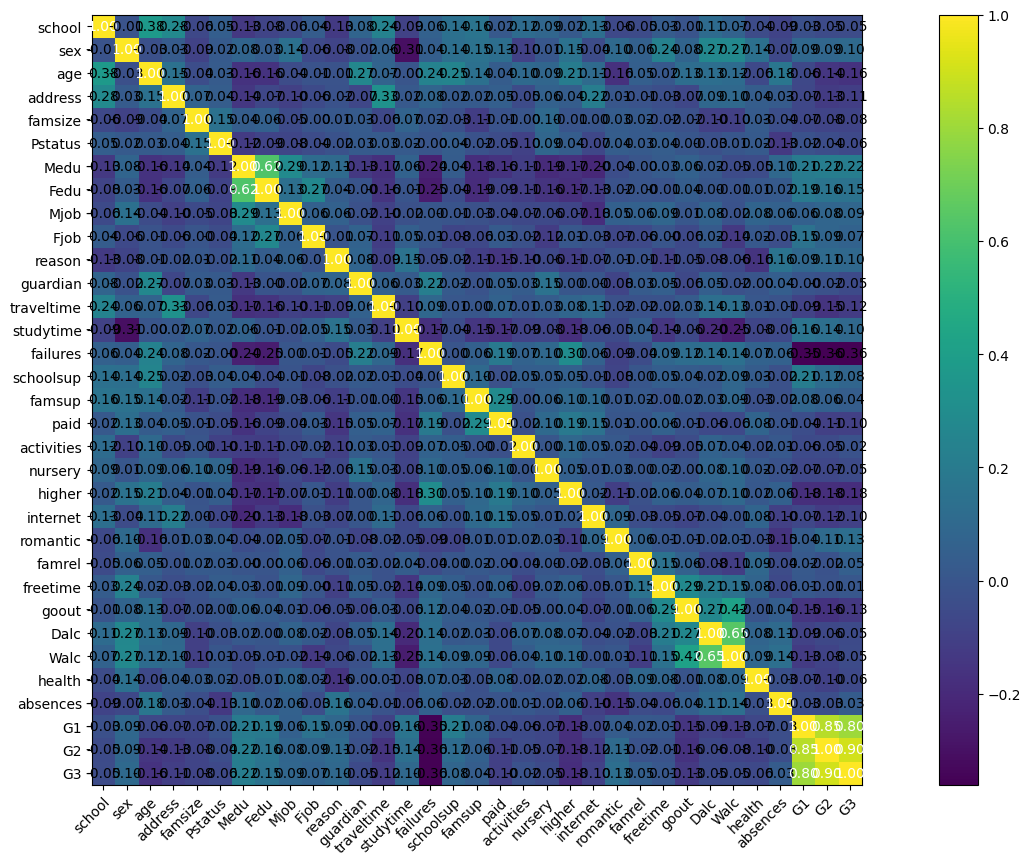

In [31]:
cm = np.corrcoef(   stu_raw_data[headers_list].values.T   )
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
plt.show()

In [32]:
## Convert Pandas to Numpy

stu_raw_data_np = stu_raw_data.to_numpy()

In [33]:

stu_raw_data_np

array([[ 0,  0, 18, ...,  5,  6,  6],
       [ 0,  0, 17, ...,  5,  5,  6],
       [ 0,  0, 15, ...,  7,  8, 10],
       ...,
       [ 1,  1, 21, ..., 10,  8,  7],
       [ 1,  1, 18, ..., 11, 12, 10],
       [ 1,  1, 19, ...,  8,  9,  9]], dtype=int64)

In [34]:
stu_raw_data_np.shape

(395, 33)

In [35]:
X = stu_raw_data_np[:, :-1]


y = stu_raw_data_np[:, 32:33]

In [36]:
y

array([[ 6],
       [ 6],
       [10],
       [15],
       [10],
       [15],
       [11],
       [ 6],
       [19],
       [15],
       [ 9],
       [12],
       [14],
       [11],
       [16],
       [14],
       [14],
       [10],
       [ 5],
       [10],
       [15],
       [15],
       [16],
       [12],
       [ 8],
       [ 8],
       [11],
       [15],
       [11],
       [11],
       [12],
       [17],
       [16],
       [12],
       [15],
       [ 6],
       [18],
       [15],
       [11],
       [13],
       [11],
       [12],
       [18],
       [11],
       [ 9],
       [ 6],
       [11],
       [20],
       [14],
       [ 7],
       [13],
       [13],
       [10],
       [11],
       [13],
       [10],
       [15],
       [15],
       [ 9],
       [16],
       [11],
       [11],
       [ 9],
       [ 9],
       [10],
       [15],
       [12],
       [ 6],
       [ 8],
       [16],
       [15],
       [10],
       [ 5],
       [14],
       [11],
       [10],
       [10],

In [37]:
print(X.shape)

print(y.shape)

(395, 32)
(395, 1)


In [38]:
random_seed = int( random.random() * 100 )     ## 42

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [40]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 32)
(79, 32)
(316, 1)
(79, 1)


In [41]:
np.set_printoptions(threshold=100)  # Reset the threshold to default or any desired value
print(X_train)

[[ 1  1 18 ...  0 11 12]
 [ 0  0 19 ...  0  9  9]
 [ 0  1 16 ...  6  7 10]
 ...
 [ 0  1 16 ...  6 12 13]
 [ 0  0 17 ... 28 10  9]
 [ 0  1 17 ...  4  6  5]]


In [42]:
y_test.dtype 

dtype('int64')

In [43]:
X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [44]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [45]:
print("X_train_tr size:", X_train_tr.size(0))
print("y_train_tr size:", y_train_tr.size(0))

X_train_tr size: 316
y_train_tr size: 316


In [46]:
print(X_train_tr.shape)
print(X_test_tr.shape)

torch.Size([316, 32])
torch.Size([79, 32])


In [47]:
x_means      = X_train_tr.mean(0, keepdim=True ) 

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [48]:
x_means

tensor([[ 0.1108,  0.4810, 16.7278,  0.2247,  0.7310,  0.8956,  2.7532,  2.4905,
          3.1551,  1.6487,  1.4557,  0.3956,  1.4430,  2.0475,  0.3481,  0.8734,
          0.3734,  0.5316,  0.4905,  0.1994,  0.0506,  0.1551,  0.6582,  3.9525,
          3.2563,  3.0791,  1.4747,  2.2405,  3.5949,  5.7911, 10.7816, 10.5981]])

In [49]:
x_deviations

tensor([[0.3144, 0.5005, 1.3028, 0.4181, 0.4442, 0.3064, 1.0791, 1.0941, 1.6306,
         0.8546, 1.2579, 0.6512, 0.6855, 0.8735, 0.7638, 0.3331, 0.4846, 0.4999,
         0.5008, 0.4003, 0.2197, 0.3626, 0.4752, 0.9264, 0.9893, 1.1340, 0.9065,
         1.2621, 1.3964, 7.6430, 3.2544, 3.7119]])

In [50]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )

In [51]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )

In [52]:

train_dl

In [53]:
class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(32, 16)  # Adjusted input size
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(16, 10)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(10, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)
        
        ## return torch.round( y_pred )
        return y_pred

In [54]:
def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 2 == 0:
            print(epoch, "loss=", loss)
            
        

In [55]:
## model = LinRegNet( x_means, x_deviations  )
model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(133.2732, grad_fn=<MseLossBackward0>)
2 loss= tensor(143.8814, grad_fn=<MseLossBackward0>)
4 loss= tensor(104.8781, grad_fn=<MseLossBackward0>)
6 loss= tensor(60.5622, grad_fn=<MseLossBackward0>)
8 loss= tensor(49.8061, grad_fn=<MseLossBackward0>)
10 loss= tensor(10.2341, grad_fn=<MseLossBackward0>)
12 loss= tensor(10.1993, grad_fn=<MseLossBackward0>)
14 loss= tensor(7.6331, grad_fn=<MseLossBackward0>)
16 loss= tensor(5.8056, grad_fn=<MseLossBackward0>)
18 loss= tensor(2.0093, grad_fn=<MseLossBackward0>)
20 loss= tensor(6.6799, grad_fn=<MseLossBackward0>)
22 loss= tensor(4.6701, grad_fn=<MseLossBackward0>)
24 loss= tensor(3.3545, grad_fn=<MseLossBackward0>)
26 loss= tensor(2.6020, grad_fn=<MseLossBackward0>)
28 loss= tensor(2.8212, grad_fn=<MseLossBackward0>)
30 loss= tensor(3.3500, grad_fn=<MseLossBackward0>)
32 loss= tensor(2.4560, grad_fn=<MseLossBackward0>)
34 loss= tensor(2.1171, grad_fn=<MseLossBackward0>)
36 loss= tensor(3.9756, grad_fn=<MseLossBackward0>)
38 loss

In [56]:
y_pred_test = model( X_test_tr )

In [57]:
y_pred_test.shape

torch.Size([79, 1])

In [58]:
## y_pred_test

In [59]:
print( "Testing R**2: ", r2_score(  y_test_tr.numpy(),  y_pred_test.detach().numpy()))

Testing R**2:  0.7312682025420332


In [60]:
y_pred_test.shape

torch.Size([79, 1])

In [61]:
y_test_tr.shape

torch.Size([79, 1])

In [62]:
len(X_test_tr)

79

In [63]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])

************************************
pred, real
(array([16.845243], dtype=float32), array([15.], dtype=float32))
************************************
pred, real
(array([16.35815], dtype=float32), array([15.], dtype=float32))
************************************
pred, real
(array([3.1150444], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([6.955094], dtype=float32), array([7.], dtype=float32))
************************************
pred, real
(array([14.265599], dtype=float32), array([15.], dtype=float32))
************************************
pred, real
(array([7.677527], dtype=float32), array([10.], dtype=float32))
************************************
pred, real
(array([14.623961], dtype=float32), array([13.], dtype=float32))
************************************
pred, real
(array([7.0664954], dtype=float32), array([9.], dtype=float32))
************************************
pred, real
(array([16.459547], dtype=float32), array([17.], dtype

In [64]:
model.eval()

dummy_input = torch.randn(1, 32)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model, 
        dummy_input,
        "DLnet_WineData.onnx",
        verbose=False,
        input_names = input_names,
        output_names = output_names
        
)

In [65]:
regressor = xgb.XGBRegressor(

        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
)

In [66]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
y_pred = regressor.predict(X_test)

In [68]:
y_pred.shape

(79,)

In [69]:
y_pred

array([15.395881  , 15.906652  ,  0.6777862 ,  6.636392  , 13.798831  ,
        9.449138  , 13.117032  ,  6.4756556 , 16.110285  , 17.29394   ,
       12.273695  ,  8.942959  , 12.646456  ,  6.3009157 ,  2.3100197 ,
        6.6024313 , 11.052942  , 13.774192  , 10.130636  ,  0.37949136,
       17.037205  , 12.157479  ,  8.722177  ,  0.21539268,  8.483178  ,
        5.578898  ,  8.321251  ,  6.2759953 , 17.925037  , 13.790757  ,
       12.884273  , 11.3744335 , 11.534482  , 11.916376  ,  9.145377  ,
        9.5511675 ,  9.029376  , 12.678157  ,  9.788824  , 12.903807  ,
       14.709747  , 19.08352   , 15.738352  , 10.596189  , 13.2509775 ,
       15.917705  , 12.027847  , 12.474451  , 11.261602  ,  9.778117  ,
        4.5813336 ,  5.564442  ,  9.798374  , 18.854443  ,  5.625477  ,
       13.509779  , 11.460833  ,  8.769119  , 14.043452  , 10.155696  ,
        7.580015  , 11.988369  ,  0.5301237 , 10.214047  , 12.874757  ,
       11.377519  ,  7.8905277 , 10.640042  , 10.6666765 ,  6.26

In [70]:
r2_score(y_test, y_pred)

0.9055406954799219

In [71]:
initial_types = [(
          'float_input',
          FloatTensorType(  [None, 32 ]  )

)]

In [72]:
onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)

onnxmltools.utils.save_model(onnx_model, 'xgboost_WineQuality_ort.onnx')

In [73]:
sess = rt.InferenceSession('xgboost_WineQuality_ort.onnx')

In [74]:
input_name = sess.get_inputs()[0].name

In [75]:
input_name

'float_input'

In [76]:
label_name = sess.get_outputs()[0].name

In [77]:
label_name

'variable'

In [78]:
pred_ort = sess.run(  [label_name], {input_name: X_test.astype(np.float32)}  )

In [79]:
pred_ort[0]

array([[15.395882  ],
       [15.906653  ],
       [ 0.6777863 ],
       [ 6.636391  ],
       [13.798831  ],
       [ 9.449143  ],
       [13.117035  ],
       [ 6.475656  ],
       [16.110283  ],
       [17.293941  ],
       [12.273697  ],
       [ 8.942959  ],
       [12.64646   ],
       [ 6.3009167 ],
       [ 2.31002   ],
       [ 6.602431  ],
       [11.052943  ],
       [13.774195  ],
       [10.130644  ],
       [ 0.3794914 ],
       [17.0372    ],
       [12.157479  ],
       [ 8.722181  ],
       [ 0.21539262],
       [ 8.48318   ],
       [ 5.5788984 ],
       [ 8.321249  ],
       [ 6.275996  ],
       [17.925035  ],
       [13.790757  ],
       [12.884274  ],
       [11.374436  ],
       [11.534487  ],
       [11.916376  ],
       [ 9.145377  ],
       [ 9.5511675 ],
       [ 9.02938   ],
       [12.678158  ],
       [ 9.788828  ],
       [12.903809  ],
       [14.70975   ],
       [19.083513  ],
       [15.738347  ],
       [10.596194  ],
       [13.250975  ],
       [15